In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
import numpy as np
import random
import os
import gc

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [179]:
train = pd.read_csv('/content/gdrive/MyDrive/서울시 기온 (1)/train.csv')
sub = pd.read_csv('/content/gdrive/MyDrive/서울시 기온 (1)/sample_submission.csv')

# lstm-baseline(3.8336)-window60-best

In [180]:
train

,일시,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온
0,1960-01-01,2.2,-5.2,7.4,NaN,68.3,1.7,6.7,NaN,NaN,-1.6
1,1960-01-02,1.2,-5.6,6.8,0.4,87.7,1.3,0.0,NaN,NaN,-1.9
2,1960-01-03,8.7,-2.1,10.8,0.0,81.3,3.0,0.0,NaN,NaN,4.0
3,1960-01-04,10.8,1.2,9.6,0.0,79.7,4.4,2.6,NaN,NaN,7.5
4,1960-01-05,1.3,-8.2,9.5,NaN,44.0,5.1,8.2,NaN,NaN,-4.6
...,...,...,...,...,...,...,...,...,...,...,...
23006,2022-12-27,3.3,-7.3,10.6,NaN,69.8,1.8,8.8,10.25,91.7,-2.6
23007,2022-12-28,0.1,-6.0,6.1,0.1,58.1,2.5,8.7,10.86,90.6,-3.3
23008,2022-12-29,2.1,-7.8,9.9,0.0,56.3,1.7,9.0,10.88,93.8,-2.9
23009,2022-12-30,2.3,-4.4,6.7,0.0,65.6,1.9,7.9,10.84,82.3,-1.8


In [181]:
sub

,일시,평균기온
0,2023-01-01,0
1,2023-01-02,0
2,2023-01-03,0
3,2023-01-04,0
4,2023-01-05,0
...,...,...
353,2023-12-20,0
354,2023-12-21,0
355,2023-12-22,0
356,2023-12-23,0


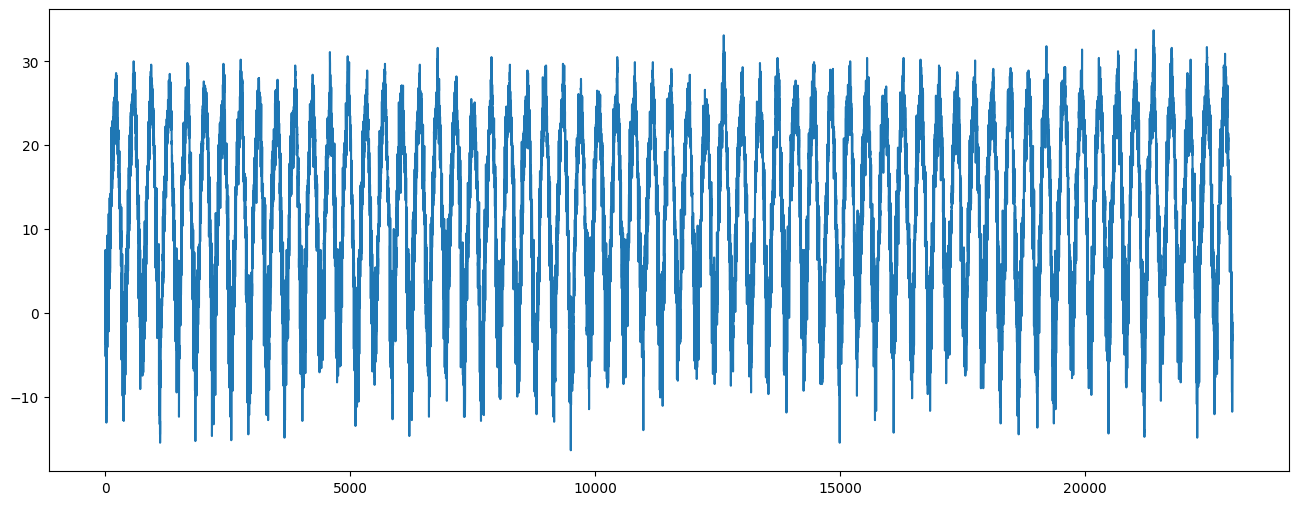

In [182]:
plt.figure(figsize=(16,6))
plt.plot(train['평균기온'])

In [183]:
data = train.filter(['평균기온'])

In [184]:
data

,평균기온
0,-1.6
1,-1.9
2,4.0
3,7.5
4,-4.6
...,...
23006,-2.6
23007,-3.3
23008,-2.9
23009,-1.8


In [185]:
dataset = data.values

In [186]:
len(dataset)

23011

In [187]:
dataset

array([[-1.6],
       [-1.9],
       [ 4. ],
       ...,
       [-2.9],
       [-1.8],
       [-1.2]])

In [188]:
from sklearn.preprocessing import MinMaxScaler

In [189]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

scaled_data

array([[0.29540918],
       [0.28942116],
       [0.40718563],
       ...,
       [0.26946108],
       [0.29141717],
       [0.30339321]])

In [190]:
sub

,일시,평균기온
0,2023-01-01,0
1,2023-01-02,0
2,2023-01-03,0
3,2023-01-04,0
4,2023-01-05,0
...,...,...
353,2023-12-20,0
354,2023-12-21,0
355,2023-12-22,0
356,2023-12-23,0


In [191]:
x_train = []
y_train = []

In [192]:
358+60

418

In [193]:
training_data_len = len(scaled_data) - 418

In [194]:
training_data_len

22593

In [195]:
train_data = scaled_data[0:int(training_data_len), :]

In [196]:
train_data.shape

(22593, 1)

In [197]:
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])

In [198]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [199]:
x_train.shape[0]

22533

In [200]:
x_train.shape

(22533, 60)

In [201]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))

In [202]:
x_train.shape

(22533, 60, 1)

In [203]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(128,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(16, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [204]:
import tensorflow as tf


In [224]:
optimizer = tf.keras.optimizers.Adam()

In [225]:
model.compile(optimizer=optimizer, loss='mean_absolute_error')

In [226]:
model

In [227]:
model.fit(x_train, y_train, batch_size=64, epochs=30)

Epoch 1/30
353/353 [==============================] - 11s 13ms/step - loss: 0.0327
Epoch 2/30
353/353 [==============================] - 6s 16ms/step - loss: 0.0327
Epoch 3/30
353/353 [==============================] - 4s 12ms/step - loss: 0.0325
Epoch 4/30
353/353 [==============================] - 5s 14ms/step - loss: 0.0325
Epoch 5/30
353/353 [==============================] - 6s 18ms/step - loss: 0.0325
Epoch 6/30
353/353 [==============================] - 4s 12ms/step - loss: 0.0324
Epoch 7/30
353/353 [==============================] - 5s 14ms/step - loss: 0.0325
Epoch 8/30
353/353 [==============================] - 6s 17ms/step - loss: 0.0321
Epoch 9/30
353/353 [==============================] - 5s 13ms/step - loss: 0.0326
Epoch 10/30
353/353 [==============================] - 4s 12ms/step - loss: 0.0323
Epoch 11/30
353/353 [==============================] - 6s 16ms/step - loss: 0.0321
Epoch 12/30
353/353 [==============================] - 5s 15ms/step - loss: 0.0326
Epoch 13/30


In [211]:
test_data = scaled_data[training_data_len:, :]

In [212]:
test_data.shape

(418, 1)

In [213]:
x_test = []
y_test = dataset[training_data_len:, :]

In [214]:
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [215]:
x_test = np.array(x_test)

In [216]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [217]:
x_test.shape

(358, 60, 1)

In [218]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

12/12 [==============================] - 2s 8ms/step


In [219]:
predictions.shape

(358, 1)

In [220]:
predictions

array([[-0.6101224 ],
       [ 1.3317151 ],
       [ 1.5076004 ],
       [ 0.64944327],
       [-7.158641  ],
       [-4.1393175 ],
       [-4.2948656 ],
       [-2.6621518 ],
       [ 0.6573313 ],
       [-2.0370266 ],
       [-4.8032827 ],
       [-3.3092554 ],
       [-3.763742  ],
       [-3.3048942 ],
       [-1.016785  ],
       [ 1.075564  ],
       [ 1.905324  ],
       [ 4.420167  ],
       [ 1.5853922 ],
       [ 1.5032569 ],
       [-0.93528444],
       [-1.5795106 ],
       [-2.3053644 ],
       [-1.1477191 ],
       [ 0.55571115],
       [-0.99350923],
       [-2.5742936 ],
       [-1.8237051 ],
       [-4.1840734 ],
       [-4.732658  ],
       [-1.3993133 ],
       [-1.5121078 ],
       [ 1.1237313 ],
       [ 1.195264  ],
       [ 1.7223555 ],
       [ 3.2727597 ],
       [ 4.758653  ],
       [ 4.284167  ],
       [ 2.2767556 ],
       [-4.4767733 ],
       [-4.590975  ],
       [-3.2960565 ],
       [ 1.6824242 ],
       [-1.4569095 ],
       [-3.4808555 ],
       [-0

In [42]:
predictions

array([[-1.54261029e+00],
       [ 3.21693689e-01],
       [ 5.73032558e-01],
       [-2.66078621e-01],
       [-8.00307751e+00],
       [-5.26280546e+00],
       [-5.24563932e+00],
       [-3.54279208e+00],
       [-2.33385772e-01],
       [-2.80450368e+00],
       [-5.66271925e+00],
       [-4.27235794e+00],
       [-4.66362286e+00],
       [-4.18257141e+00],
       [-1.90429485e+00],
       [ 2.05826432e-01],
       [ 1.05797529e+00],
       [ 3.41944456e+00],
       [ 8.33422601e-01],
       [ 6.00729465e-01],
       [-1.76460373e+00],
       [-2.46970367e+00],
       [-3.15574265e+00],
       [-1.96326327e+00],
       [-1.78129271e-01],
       [-1.62056482e+00],
       [-3.25982046e+00],
       [-2.57072806e+00],
       [-4.89320898e+00],
       [-5.50159931e+00],
       [-2.17505908e+00],
       [-2.13401532e+00],
       [ 3.84096175e-01],
       [ 5.25886536e-01],
       [ 9.71020401e-01],
       [ 2.44480515e+00],
       [ 3.89557791e+00],
       [ 3.48328924e+00],
       [ 1.5

In [221]:
sub['평균기온'] = predictions

In [222]:
sub

,일시,평균기온
0,2023-01-01,-0.610122
1,2023-01-02,1.331715
2,2023-01-03,1.507600
3,2023-01-04,0.649443
4,2023-01-05,-7.158641
...,...,...
353,2023-12-20,-2.658643
354,2023-12-21,-1.723267
355,2023-12-22,-2.880428
356,2023-12-23,-1.840932


In [223]:
sub.to_csv('./lstm-base-adamw.csv', index = False)

# 뭐해보지